# Jonathan Halverson
# Monday, August 7, 2017
# Chapter 6: Statistical machine learning

Structure-based for data-driven methods: Linear and logistic regression are said to be structure-based while KNN and tree methods are data-driven. Tree methods were released in 1984 by Breiman and Friedman in California. Bagging and boosting came out in the 1990's.

It is suggested to use Mahalanobis distance when working with features that may be correlated. This will treat correlate features as one instead of as individuals which will weight the distance. Gower's distance may also be considered since it handles mixed continuous and indicator variables and prevents the indicator variables from dominating the calculation of distance or variance. Mahalanobis is expensive and requires the calculation of the covariance matrix.

In [126]:
from sklearn.neighbors import DistanceMetric

In [127]:
X = [[-0.1, 1, 2.8],
     [3, 4.2, 5]]

In [128]:
dist = DistanceMetric.get_metric('euclidean')
dist.pairwise(X)

array([[ 0.       ,  4.9689033],
       [ 4.9689033,  0.       ]])

This is a convenience routine for the sake of testing.  For many
metrics, the utilities in scipy.spatial.distance.cdist and
scipy.spatial.distance.pdist will be faster.

In [129]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise(X)

array([[ 0. ,  8.5],
       [ 8.5,  0. ]])

In [130]:
import numpy as np

dist = DistanceMetric.get_metric('mahalanobis', V=np.cov(X))
#dist.pairwise(X) appears that this has not been implemented yet

Of course, it is very important to standardize the features when using KNN.

In linear and logistic regression, one hot encoding causes a multicollinearity error. It works fine for tree-based models.

The bias-varance tradeoff: High variance results when the model is over fit and different training sets give large variation. Bias refers to more data not improving the fit because the model is lacking complexity. There is a balance between the structure of the data, the amount of data one has, and the complexity of the model.

### One-hot encoding

In [131]:
import pandas as pd

In [132]:
df = pd.DataFrame({'Age':[22.6, 34.1, 56.2], 'Type':['car', 'truck', 'frog']})
df

,Age,Type
0,22.6,car
1,34.1,truck
2,56.2,frog


In [133]:
from sklearn import preprocessing

type_encoder = preprocessing.LabelEncoder()
df['Type'] = type_encoder.fit_transform(df['Type'])
df

,Age,Type
0,22.6,0
1,34.1,2
2,56.2,1


In [134]:
enc = preprocessing.OneHotEncoder(sparse=False)
x = enc.fit_transform(df.Type.values.reshape(-1, 1))

In [135]:
df = pd.concat([df, pd.DataFrame(x)], axis=1, ignore_index=True)
df.columns = ['Age', 'Type', 'Car', 'Frog', 'Truck']
df

,Age,Type,Car,Frog,Truck
0,22.6,0,1.0,0.0,0.0
1,34.1,2,0.0,0.0,1.0
2,56.2,1,0.0,1.0,0.0


In [136]:
df = df.drop(['Type'], axis=1)
df

,Age,Car,Frog,Truck
0,22.6,1.0,0.0,0.0
1,34.1,0.0,0.0,1.0
2,56.2,0.0,1.0,0.0


It appears that Gower's distance is not implemented in Python.

In [137]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise(df.values)

array([[  0. ,  13.5,  35.6],
       [ 13.5,   0. ,  24.1],
       [ 35.6,  24.1,   0. ]])

### Pandas approach to indicator variables

In [142]:
df = pd.DataFrame({'Age':[22.6, 34.1, 56.2], 'Type':['car', 'truck', 'frog']})
df

,Age,Type
0,22.6,car
1,34.1,truck
2,56.2,frog


In [143]:
pd.get_dummies(df)

,Age,Type_car,Type_frog,Type_truck
0,22.6,1,0,0
1,34.1,0,0,1
2,56.2,0,1,0


Just as Chi-square tests can be used to see if certain class outcomes show an evalated count with respect to certain features, one can use KNN to generate features. Because only a few other records are used for each record, multicollinearity is not introduced.

In [154]:
df = pd.read_csv('http://blog.yhat.com/static/misc/data/pigeon-racing.csv')
df['Length'] = df.Breeder.apply(lambda u: len(u.strip()))
df.head()

,Pos,Breeder,Pigeon,Name,Color,Sex,Ent,Arrival,Speed,To Win,Eligible,Length
0,1,Texas Outlaws,19633-AU15-FOYS,NaN,BCWF,H,1,42:14.0,172.155,0:00:00,Yes,13
1,2,Junior Juanich,0402-AU15-JRL,NaN,SIWF,H,1,47:36.0,163.569,0:05:21,Yes,14
2,3,Jerry Allensworth,0404-AU15-VITA,Perch Potato,BB,H,1,47:41.0,163.442,0:05:27,Yes,17
3,4,Alias-Alias,2013-AU15-ALIA,NaN,BBSP,H,1,47:43.0,163.392,0:05:28,Yes,11
4,5,Greg Glazier,5749-AU15-SLI,NaN,BC,H,1,47:44.0,163.366,0:05:30,Yes,12


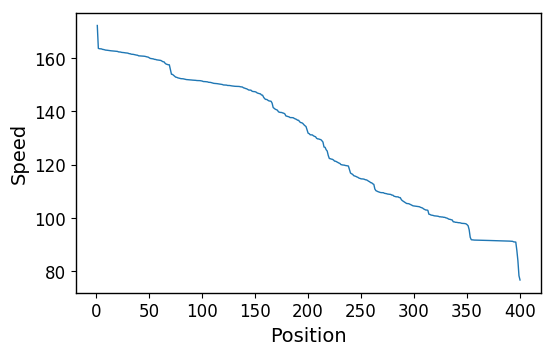

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

plt.plot(df.Pos, df.Speed)
plt.xlabel('Position')
plt.ylabel('Speed')